In [8]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import astropy
from astropy.time import Time
from astropy.time import TimeDelta

from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun

In [9]:
#tranist information

names=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[2],dtype='string')
tdur=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[10])
midtimejd=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[15])
midair=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[16])
midtimealt=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[17])

startjd=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[20])
startair=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[21])
startalt=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[22])

endjd=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[25])
endair=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[26])
endalt=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[27])

RA=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[6])
DC=np.genfromtxt('transits.csv',delimiter=',',skip_header=38,usecols=[7])

#astropy time object
t=Time(midtimejd, format='jd', scale='utc')

In [10]:
#find unique objects and save number of transits
uniquenames=np.array([])
numtrans=np.array([])

for n in names:
    if not n in uniquenames:
        uniquenames=np.append(uniquenames,n)
        numtrans=np.append(numtrans,0)
    if n in uniquenames:
        ind=np.where(uniquenames==n)[0]
        numtrans[ind]+=1

#save file to upload to exoplanet archive for object data
namesave=open('2018A_Planets_May.txt','w')
for n in uniquenames:
    namesave.write('{0}\n'.format(n))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [11]:
#load in exoplanetarchive savefile
#save all columns for this to work
planetname=np.genfromtxt('planets.csv',delimiter=',',usecols=[70],skip_header=407,dtype='string')

hostname=np.genfromtxt('planets.csv',delimiter=',',usecols=[1],skip_header=407,dtype='string')
planetletter=np.genfromtxt('planets.csv',delimiter=',',usecols=[2],skip_header=407,dtype='string')

planetmass=np.genfromtxt('planets.csv',delimiter=',',usecols=[21],skip_header=407,filling_values='Nan')
planetradius=np.genfromtxt('planets.csv',delimiter=',',usecols=[26],skip_header=407,filling_values='Nan')#/10.864
planetdensity=np.genfromtxt('planets.csv',delimiter=',',usecols=[30],skip_header=407,filling_values='Nan')
planetau=np.genfromtxt('planets.csv',delimiter=',',usecols=[9],skip_header=407,filling_values='Nan')

mag=np.genfromtxt('planets.csv',delimiter=',',usecols=[46],skip_header=407,filling_values='Nan')
starradius=np.genfromtxt('planets.csv',delimiter=',',usecols=[64],skip_header=407,filling_values='Nan')
startemp=np.genfromtxt('planets.csv',delimiter=',',usecols=[54],skip_header=407,filling_values='Nan')

transit=np.genfromtxt('planets.csv',delimiter=',',usecols=[128],skip_header=407,filling_values='Nan')

In [12]:
##### K2 Candidates #####
c4='/Users/ermay/Desktop/Magellan/K2candidates/allc4candidates.txt'
c5='/Users/ermay/Desktop/Magellan/K2candidates/allcandC5.txt'
c6='/Users/ermay/Desktop/Magellan/K2candidates/c6allcandidates.txt'
c7='/Users/ermay/Desktop/Magellan/K2candidates/allcandidatesc7.txt'
c8='/Users/ermay/Desktop/Magellan/K2candidates/c8vettedcandidates.txt'
c11='/Users/ermay/Desktop/Magellan/K2candidates/c11allcandidatesvetted.txt'
c13='/Users/ermay/Desktop/Magellan/K2candidates/c13allcandidates.txt'

K2_nm=np.array([])     #planet identifier
K2_RA=np.array([])     #RA
K2_DC=np.array([])     #Declination
K2_t0=np.array([])     #Center of observed transit
K2_Pd=np.array([])     #Planet Orbital Period, days
K2_dt=np.array([])     #Transit Duation, hours
K2_Te=np.array([])     #Planet Effective Temperature   
K2_Rs=np.array([])     #Radius Star,R_sun
K2_dp=np.array([])     #Transit Depth, %
K2_Rp=np.array([])     #Radius Planet, R_earth
K2_Vm=np.array([])     #Vmag

Rsun=6.96*10**10.
Rearth=6.37*10**8.

c4f=open(c4,'r')
c5f=open(c5,'r')
c6f=open(c6,'r')
c7f=open(c7,'r')
c8f=open(c8,'r')
c11f=open(c11,'r')
c13f=open(c13,'r')

numlines=np.array([sum(1 for line in c4f),sum(1 for line in c5f),sum(1 for line in c6f),sum(1 for line in c7f),sum(1 for line in c8f),sum(1 for line in c11f),sum(1 for line in c13f)])

c4f.close()
c5f.close()
c6f.close()
c7f.close()
c8f.close()
c11f.close()
c13f.close()

c4r=open(c4,'r')
c5r=open(c5,'r')
c6r=open(c6,'r')
c7r=open(c7,'r')
c8r=open(c8,'r')
c11r=open(c11,'r')
c13r=open(c13,'r')

files=np.array([c4r,c5r,c6r,c7r,c8r,c11r,c13r])

for f in files:
    fn=np.where(files==f)[0]
    num_lines=numlines[np.where(files==f)[0]]
    print fn,'   ',num_lines
    linen=1
    while linen<=num_lines:
        line=f.readline()
        split=line.split()
        if linen % 3 ==1:
            K2_nm=np.append(K2_nm,split[2])
            K2_RA=np.append(K2_RA,split[3])
            K2_DC=np.append(K2_DC,split[4])
            a=split[7].split(',')
            K2_t0=np.append(K2_t0,float((a[2].split('='))[1]))
            K2_Pd=np.append(K2_Pd,float((a[0].split('='))[1]))
        if linen % 3 ==2:
            #print split
            K2_Te=np.append(K2_Te,float(split[2].split(',')[0]))
            K2_Rs=np.append(K2_Rs,float(split[5]))
            K2_dp=np.append(K2_dp,float(split[9].split('%')[0]))
            K2_Rp=np.append(K2_Rp,float(split[12]))
            if fn==1:
                K2_Vm=np.append(K2_Vm,np.nan)
            else:
                K2_Vm=np.append(K2_Vm,float(split[14].split('=')[1]))
        linen+=1
    print len(K2_nm),len(K2_RA),len(K2_DC),len(K2_t0),len(K2_Pd),len(K2_Te),len(K2_Rs),len(K2_dp),len(K2_Rp),len(K2_Vm)

c4r.close()
c5r.close()
c6r.close()
c7r.close()
c8r.close()
c11r.close()
c13r.close()


K2_td=(K2_Pd/np.pi)*np.arcsin((K2_Rs*Rsun))

[0]     [176]
59 59 59 59 59 59 59 59 59 59
[1]     [357]
178 178 178 178 178 178 178 178 178 178
[2]     [218]
251 251 251 251 251 251 251 251 251 251
[3]     [299]
351 351 351 351 351 351 351 351 351 351
[4]     [251]
435 435 435 435 435 435 435 435 435 435
[5]     [251]
519 519 519 519 519 519 519 519 519 519
[6]     [314]
624 624 624 624 624 624 624 624 624 624


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:90: RuntimeWarning: invalid value encountered in arcsin


In [17]:
massjup=1.89*10**30
radjup=7.140*10**9

JOVIANSmass=(1.0,0.29941,0.053953,0.0457346)
JOVIANSdens=(1.3262,0.6871,1.638,1.27)
JOVIANSrads=(1.0,0.8286,0.35494,0.36526)

EARTHmass=(0.003146)
EARTHdens=(5.515)
EARTHrads=(0.092051)

#WASP 4b#
#p=30
#planetmass[p]=1.237
#planetdensity[p]=0.612
#planetau[p]=0.023

#Wasp 29b#
#p=107
#mag[]=11.3

In [59]:
MAY_2018A_targets_index=np.array([6,7,18,20,36,42,50,63,72,85,88,98,111,120,130,136,137,144])
names_18A=names[MAY_2018A_targets_index]
print names_18A
uniquenames_18A_index=np.array([])
#uniquenames_18A=np.array([])
for i in names_18A:
    index=int(np.where(uniquenames==i)[0])
    if index not in uniquenames_18A_index:
        index=int(index)
        uniquenames_18A_index=np.append(uniquenames_18A_index,index)
#        uniquenames_18A=np.append(uniquenames_18A,i)
        
uniquenames_18A_index=np.sort(uniquenames_18A_index.astype(int))
uniquenames_18A=uniquenames[uniquenames_18A_index]
planetradius_18A=planetradius[uniquenames_18A_index]
planetmass_18A=planetmass[uniquenames_18A_index]
planetdensity_18A=planetdensity[uniquenames_18A_index]

for i in range(0,len(uniquenames_18A)):
    print i, uniquenames_18A[i]

['WASP-157 b' 'KELT-10 b' 'WASP-15 b' 'HATS-10 b' 'HAT-P-45 b' 'HAT-P-46 b'
 'HATS-24 b' 'HATS-35 b' 'WASP-24 b' 'HATS-24 b' 'HATS-28 b' 'HATS-23 b'
 'HATS-24 b' 'HATS-9 b' 'WASP-67 b' 'WASP-15 b' 'HATS-29 b' 'HATS-35 b']
0 WASP-157 b
1 KELT-10 b
2 WASP-24 b
3 WASP-15 b
4 HATS-24 b
5 HATS-10 b
6 HATS-29 b
7 HAT-P-45 b
8 HAT-P-46 b
9 HATS-35 b
10 HATS-28 b
11 HATS-23 b
12 HATS-9 b
13 WASP-67 b


[ 0.574  0.679  0.542  0.526  0.892  0.493] [ 0.64   0.308  0.247  0.7    0.38   0.28 ] [ 1.065  1.399  1.428  0.969  1.426  1.284]
[ 0.07943282  0.11220185  0.15848932]


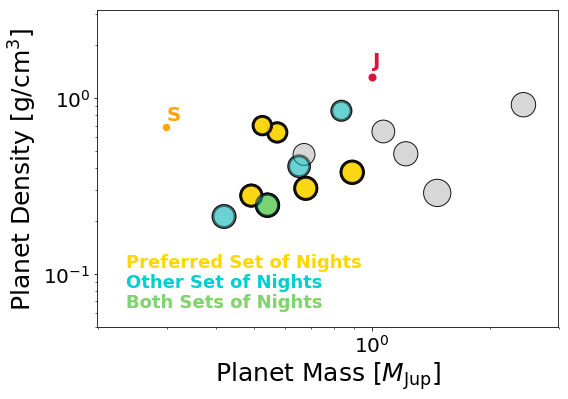

In [147]:
#obsc='gold'
#futc='cornflowerblue'
obsc='firebrick'
futc='mediumblue'

# 6,7,18,20,36,42,50,63,72,85,88,98,111,120,130,136,137,144
preferred=np.array([0,1,3,5,7,8])
second=np.array([12,13,3,6])
second_K2=np.array([23])

plt.figure(figsize=(8,5.5))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.15,right=0.95)
plt.scatter(planetmass_18A,planetdensity_18A,s=400*planetradius_18A,c='lightgrey',edgecolor='black',alpha=0.9)

p_mass=planetmass_18A[preferred]
p_dens=planetdensity_18A[preferred]
p_rads=planetradius_18A[preferred]
print p_mass,p_dens,p_rads

plt.scatter(p_mass,p_dens,s=350*p_rads,c='gold',edgecolor='black',linewidth=3.0,alpha=0.9)

p_mass=planetmass_18A[second]
p_dens=planetdensity_18A[second]
p_rads=planetradius_18A[second]

plt.scatter(p_mass,p_dens,s=350*p_rads,c='darkturquoise',edgecolor='black',linewidth=3.0,alpha=0.5)

#plt.plot(planetmass[64],planetdensity[64],'.',markersize=35*planetradius[64],markerfacecolor='yellowgreen',markeredgecolor='black',markeredgewidth=2.0)
#plt.plot(planetmass[107],planetdensity[107],'.',markersize=40*planetradius[107],markerfacecolor='yellowgreen',markeredgecolor='black',markeredgewidth=2.0)
#plt.plot(planetmass[43],planetdensity[43],'.',markersize=50*planetradius[43],markerfacecolor=obsc,markeredgecolor='black')
#plt.plot(planetmass[30],planetdensity[30],'.',markersize=33*planetradius[30],markerfacecolor=obsc,markeredgecolor='black')
#plt.plot(planetmass[23],planetdensity[23],'.',markersize=31*planetradius[23],markerfacecolor=obsc,markeredgecolor='black')
#plt.plot(planetmass[163],planetdensity[163],'.',markersize=50*planetradius[163],markerfacecolor=obsc,markeredgecolor='black')

#plt.plot(planetmass[103],planetdensity[103],'.',markersize=48*planetradius[103],markerfacecolor=futc,markeredgecolor='black')
#plt.plot(planetmass[105],planetdensity[105],'.',markersize=41*planetradius[105],markerfacecolor=futc,markeredgecolor='black')
#plt.plot(planetmass[64],planetdensity[64],'.',markersize=41*planetradius[64],markerfacecolor=futc,markeredgecolor='black')
#plt.plot(planetmass[107],planetdensity[107],'.',markersize=41*planetradius[107],markerfacecolor=futc,markeredgecolor='black')
#plt.plot(planetmass[26],planetdensity[26],'.',markersize=31*planetradius[26],markerfacecolor=futc,markeredgecolor='black')

#plt.text(planetmass[43],planetdensity[43],'d',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')
#plt.text(planetmass[30],planetdensity[30],'b',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')
#plt.text(planetmass[23],planetdensity[23],'c',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')
#plt.text(planetmass[163]+0.008,planetdensity[163]-0.08,'a',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')

plt.scatter(JOVIANSmass[0],JOVIANSdens[0],c='crimson',s=50*JOVIANSrads[0])
plt.scatter(JOVIANSmass[1],JOVIANSdens[1],c='orange',s=50*JOVIANSrads[1])
plt.scatter(JOVIANSmass[2],JOVIANSdens[2],c='lightseagreen',s=50*JOVIANSrads[2])
plt.scatter(JOVIANSmass[3],JOVIANSdens[3],c='skyblue',s=50*JOVIANSrads[3])
plt.scatter(EARTHmass,EARTHdens,c='deepskyblue',s=50*EARTHrads)
plt.text(JOVIANSmass[0],JOVIANSdens[0]+0.18,'J',color='crimson',fontsize=20,fontweight='bold')
plt.text(JOVIANSmass[1],JOVIANSdens[1]+0.06,'S',color='orange',fontsize=20,fontweight='bold')
#plt.text(JOVIANSmass[2],JOVIANSdens[2]+0.15,'N',color='lightseagreen',fontsize=20,fontweight='bold')
#plt.text(JOVIANSmass[3],JOVIANSdens[3]+0.08,'U',color='skyblue',fontsize=20,fontweight='bold')

#for i in range(0,len(planetname)):
#    if not np.isfinite(planetmass[i]) or not np.isfinite(planetdensity[i]):
#        continue
#    if planetdensity[i]>10**-1 and planetdensity[i]<1.5*10**1:
#        plt.text(planetmass[i],planetdensity[i],str(int(i)),color='black')
#plt.text(EARTHmass,EARTHdens+.3,'E',color='deepskyblue',fontsize=20,fontweight='bold')
#plt.figtext(0.43,0.48,'Wasp-29b', color='yellowgreen', fontsize=18,fontweight='bold')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.5*10**-1,1*10**0.5)
plt.xlim(10**-0.7,1.5*10**0.3)
#plt.xlim(9,14)
plt.tick_params(labelsize=20)
#plt.legend(loc='lower right',fontsize=15,scatterpoints=1)
plt.xlabel('$\mathrm{Planet}$ $\mathrm{Mass}$ [$M_{\mathrm{Jup}}$]',fontsize=25)
plt.ylabel('$\mathrm{Planet}$ $\mathrm{Density}$ [$\mathrm{g/cm^3}$]',fontsize=25)

p=np.logspace(-1.1,-0.8,num=3)
print p

plt.figtext(0.2,0.3,'Preferred Set of Nights',color='gold',fontsize=18,fontweight='bold')
plt.figtext(0.2,0.25,'Other Set of Nights',color='darkturquoise',fontsize=18,fontweight='bold')
plt.figtext(0.2,0.2,'Both Sets of Nights',color='gold',fontsize=18,fontweight='bold',alpha=0.9)
plt.figtext(0.2,0.2,'Both Sets of Nights',color='darkturquoise',fontsize=18,fontweight='bold',alpha=0.5)

#plt.annotate('Planned',xy=(0.0015,p[1]),color='yellowgreen',fontsize=18,fontweight='bold')
#plt.annotate('Future',xy=(0.0015,p[0]),color=futc,fontsize=18,fontweight='bold')

plt.savefig('densmass_rad_2018A_M_final.pdf',transparent=True)

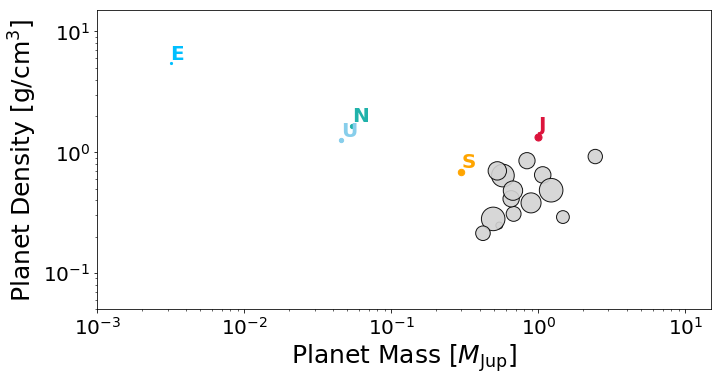

In [63]:
#obsc='gold'


trans=(planetradius/starradius)**2.

plt.figure(figsize=(11,5.5))
plt.scatter(planetmass_18A,planetdensity_18A,s=300*trans,c='lightgrey',edgecolor='black',alpha=0.9)
#plt.plot(planetmass[64],planetdensity[64],'.',markersize=41*trans[64],markerfacecolor='yellowgreen',markeredgecolor='black',markeredgewidth=2.0)
#plt.plot(planetmass[107],planetdensity[107],'.',markersize=40*trans[107],markerfacecolor='yellowgreen',markeredgecolor='black',markeredgewidth=2.0)
#plt.plot(planetmass[43],planetdensity[43],'.',markersize=50*trans[43],markerfacecolor=obsc,markeredgecolor='black')
#plt.plot(planetmass[30],planetdensity[30],'.',markersize=29*trans[30],markerfacecolor=obsc,markeredgecolor='black')
#plt.plot(planetmass[23],planetdensity[23],'.',markersize=23*trans[23],markerfacecolor=obsc,markeredgecolor='black')
#plt.plot(planetmass[163],planetdensity[163],'.',markersize=50*trans[163],markerfacecolor=obsc,markeredgecolor='black')

#plt.plot(planetmass[26],planetdensity[26],'.',markersize=30*trans[26],markerfacecolor=futc,markeredgecolor='black')
#plt.plot(planetmass[103],planetdensity[103],'.',markersize=51*trans[103],markerfacecolor=futc,markeredgecolor='black')
#plt.plot(planetmass[105],planetdensity[105],'.',markersize=40*trans[105],markerfacecolor=futc,markeredgecolor='black')
#plt.plot(planetmass[107],planetdensity[107],'.',markersize=35*trans[107],markerfacecolor=futc,markeredgecolor='black')
#plt.plot(planetmass[26],planetdensity[26],'.',markersize=31*trans[26],markerfacecolor=futc,markeredgecolor='black')
#plt.plot(planetmass[64],planetdensity[64],'.',markersize=43*trans[64],markerfacecolor=futc,markeredgecolor='black')

#plt.text(planetmass[43],planetdensity[43],'d',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')
#plt.text(planetmass[30],planetdensity[30],'b',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')
#plt.text(planetmass[23],planetdensity[23],'c',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')
#plt.text(planetmass[163],planetdensity[163],'a',fontsize=12,color='black',horizontalalignment='center',verticalalignment='center')

plt.scatter(JOVIANSmass[0],JOVIANSdens[0],c='crimson',s=50*JOVIANSrads[0])
plt.scatter(JOVIANSmass[1],JOVIANSdens[1],c='orange',s=50*JOVIANSrads[1])
plt.scatter(JOVIANSmass[2],JOVIANSdens[2],c='lightseagreen',s=50*JOVIANSrads[2])
plt.scatter(JOVIANSmass[3],JOVIANSdens[3],c='skyblue',s=50*JOVIANSrads[3])
plt.scatter(EARTHmass,EARTHdens,c='deepskyblue',s=50*EARTHrads)
plt.text(JOVIANSmass[0],JOVIANSdens[0]+0.18,'J',color='crimson',fontsize=20,fontweight='bold')
plt.text(JOVIANSmass[1],JOVIANSdens[1]+0.06,'S',color='orange',fontsize=20,fontweight='bold')
plt.text(JOVIANSmass[2],JOVIANSdens[2]+0.15,'N',color='lightseagreen',fontsize=20,fontweight='bold')
plt.text(JOVIANSmass[3],JOVIANSdens[3]+0.08,'U',color='skyblue',fontsize=20,fontweight='bold')

#for i in range(0,len(planetname)):
#    if not np.isfinite(planetmass[i]) or not np.isfinite(planetdensity[i]):
#        continue
#    if planetdensity[i]>10**-1 and planetdensity[i]<1.5*10**1:
#        plt.text(planetmass[i],planetdensity[i],str(int(i)),color='black')

plt.text(EARTHmass,EARTHdens+.3,'E',color='deepskyblue',fontsize=20,fontweight='bold')
#plt.figtext(0.43,0.48,'WASP-29b', color='yellowgreen', fontsize=18,fontweight='bold')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.5*10**-1,1.5*10**1)
plt.xlim(10**-3,1.5*10**1)
#plt.xlim(9,14)
plt.tick_params(labelsize=20)
#plt.legend(loc='lower right',fontsize=15,scatterpoints=1)
plt.xlabel('$\mathrm{Planet}$ $\mathrm{Mass}$ [$M_{\mathrm{Jup}}$]',fontsize=25)
plt.ylabel('$\mathrm{Planet}$ $\mathrm{Density}$ [$\mathrm{g/cm^3}$]',fontsize=25)

plt.savefig('denmass_trans_2018A_M.pdf',transparent=True)

In [80]:
G=6.67*10**-8  #grav in cgs
kboltz=1.38*10**-16
mu=2.5
mh=1.67*10**-24
massjup=1.89*10**30
radjup=7.140*10**9
radsun=6.96*10**10
AU=1.496*10**13.  #cm

planettemp=startemp*(0.25**0.25)*((starradius*radsun)/(planetau*AU))**(1./2.)

g=G*planetmass*massjup/(planetradius*radjup)**2.

H=kboltz*planettemp/(mu*mh*g)
scaleheight=3.0*H

ABSORP=2.0*planetradius*radjup*scaleheight/(starradius*radsun)**2.

In [100]:
mag_18A=mag[uniquenames_18A_index]
planettemp_18A=planettemp[uniquenames_18A_index]
ABSORP_18A=ABSORP[uniquenames_18A_index]

print uniquenames_18A
print planetradius_18A
print mag_18A
print planettemp_18A
print ABSORP_18A*10**6.

        
mag_18A[7]=12.794
mag_18A[8]=11.936

['WASP-157 b' 'KELT-10 b' 'WASP-24 b' 'WASP-15 b' 'HATS-24 b' 'HATS-10 b'
 'HATS-29 b' 'HAT-P-45 b' 'HAT-P-46 b' 'HATS-35 b' 'HATS-28 b' 'HATS-23 b'
 'HATS-9 b' 'WASP-67 b']
[ 1.065  1.399  1.3    1.428  1.487  0.969  1.251  1.426  1.284  1.464
  1.194  1.86   1.065  1.4  ]
[ 12.91   10.854  11.306  11.     12.83   13.113  12.612     nan     nan
  12.56   13.934  13.901  13.276  12.5  ]
[ 1301.3655373   1377.23426274  1768.43870479  1654.79789413  2074.44703744
  1403.54378786  1208.945467    1649.85312393  1453.9563168   2031.53951148
  1251.39632978  1656.89319101  1815.56851081  1036.73907363]
[  253.53721795   448.41777772   242.43185839   479.80993859   241.39934206
   237.18573073   374.24868118   363.87608898   376.53540129   301.55573871
   442.71608829   595.40968412   137.66256711  1057.85989653]


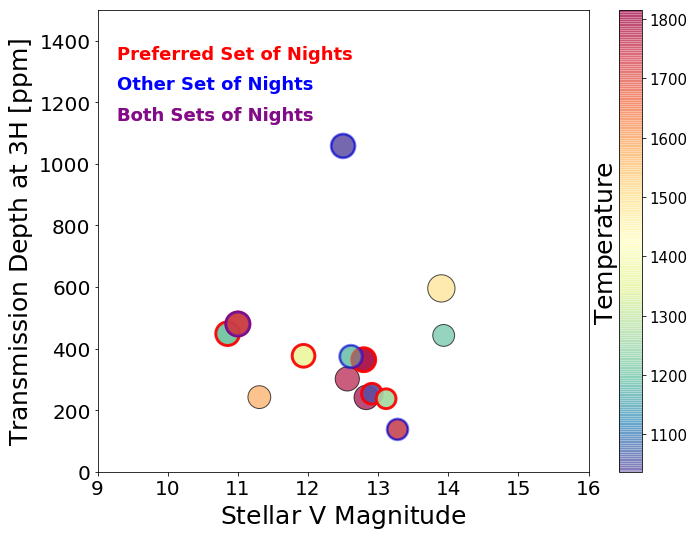

In [115]:
plt.figure(figsize=(11,8.5))
plt.scatter(mag_18A,ABSORP_18A*10**6,s=400*planetradius_18A,c=planettemp_18A,edgecolor='black',alpha=0.7,label='$\mathrm{Magellan}$ $\mathrm{Candidates}$',cmap=matplotlib.cm.Spectral_r)

preferred=np.array([0,1,3,5,7,8])
second=np.array([12,13,3,6])
second_K2=np.array([23])

p_mag=mag_18A[preferred]
p_abs=ABSORP_18A[preferred]
p_rad=planetradius_18A[preferred]
p_tmp=planettemp_18A[preferred]

plt.scatter(p_mag,p_abs*10**6,s=400*p_rad,c=p_tmp,edgecolor='red',cmap=matplotlib.cm.Spectral_r,linewidth=3.0,alpha=0.9)

p_mag=mag_18A[second]
p_abs=ABSORP_18A[second]
p_rad=planetradius_18A[second]
p_tmp=planettemp_18A[second]

plt.scatter(p_mag,p_abs*10**6,s=400*p_rad,c=p_tmp,edgecolor='blue',cmap=matplotlib.cm.Spectral_r,linewidth=3.0,alpha=0.5)


#plt.plot(mag[107],ABSORP[107]*10**6.,'.',markersize=55*planetradius[107],markerfacecolor='none',markeredgecolor='black',markeredgewidth=5.0)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=15)

#for i in range(0,len(planetname)):
#    if not np.isfinite(mag[i]) or not np.isfinite(ABSORP[i]):
#        continue
#    if mag[i]>9 and mag[i]<16:
#        if ABSORP[i]>0 and ABSORP[i]<1500:
#            if planetradius[i]>0.0 and planetradius[i]<0.6:
#                plt.text(mag[i]-0.1,ABSORP[i]*10**6.,str(int(i)),color='black',fontweight='bold')
#plt.text(mag[26]-1.0,ABSORP[26]*10**6,'Hat-P-26b',fontsize=18,fontweight='bold')
#plt.annotate('WASP-29b',xy=(mag[107],ABSORP[107]*10**6),xytext=(13.7,800),fontsize=18,fontweight='bold',arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylim(0,1500)
plt.xlim(9,16)
plt.tick_params(labelsize=20)

plt.ylabel('$\mathrm{Transmission}$ $\mathrm{Depth}$ $\mathrm{at}$ $3\mathrm{H}$ $\mathrm{[ppm]}$',fontsize=25)
plt.xlabel('$\mathrm{Stellar}$ $\mathrm{V}$ $\mathrm{Magnitude}$',fontsize=25)
plt.figtext(0.75,0.5,'$\mathrm{Temperature}$',rotation='vertical',fontsize=25,fontweight='bold',va='center')

plt.figtext(0.15,0.8,'Preferred Set of Nights',color='red',fontsize=18,fontweight='bold')
plt.figtext(0.15,0.75,'Other Set of Nights',color='blue',fontsize=18,fontweight='bold')
plt.figtext(0.15,0.7,'Both Sets of Nights',color='red',fontsize=18,fontweight='bold',alpha=0.9)
plt.figtext(0.15,0.7,'Both Sets of Nights',color='blue',fontsize=18,fontweight='bold',alpha=0.5)
#plt.savefig('transm_depth_2018A_M_t.eps')

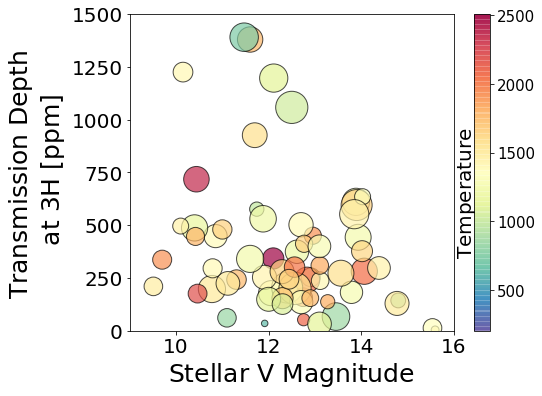

In [210]:
obsc='firebrick'
futc='mediumblue'

plt.figure(figsize=(7.5,5.5))
plt.gcf().subplots_adjust(bottom=0.15,top=0.95,left=0.25,right=1)
plt.scatter(mag,ABSORP*10**6,s=400*trans,c=planettemp,edgecolor='black',alpha=0.7,label='$\mathrm{Magellan}$ $\mathrm{Candidates}$',cmap=matplotlib.cm.Spectral_r)

#plt.plot(mag[64],ABSORP[64]*10**6.,'.',markersize=44*trans[64],markerfacecolor='none',markeredgecolor='black',markeredgewidth=3.0)
cbar=plt.colorbar()
cbar.ax.tick_params(labelsize=15)

#plt.plot(mag[43],ABSORP[43]*10**6.,'.',markersize=48*trans[43],markerfacecolor='none',markeredgecolor=obsc,markeredgewidth=3.0)
#plt.plot(mag[30],ABSORP[30]*10**6.,'.',markersize=29*trans[30],markerfacecolor='none',markeredgecolor=obsc,markeredgewidth=3.0)
#plt.plot(mag[23],ABSORP[23]*10**6.,'.',markersize=25*trans[23],markerfacecolor='none',markeredgecolor=obsc,markeredgewidth=3.0)
#plt.plot(mag[163],ABSORP[163]*10**6.,'.',markersize=48*trans[163],markerfacecolor='none',markeredgecolor=obsc,markeredgewidth=3.0)


#plt.plot(mag[103],ABSORP[103]*10**6.,'.',markersize=42*trans[103],markerfacecolor='none',markeredgecolor=futc,markeredgewidth=3.0)
#plt.plot(mag[105],ABSORP[105]*10**6.,'.',markersize=42*trans[105],markerfacecolor='none',markeredgecolor=futc,markeredgewidth=3.0)
#plt.plot(mag[64],ABSORP[64]*10**6.,'.',markersize=42*trans[64],markerfacecolor='none',markeredgecolor=futc,markeredgewidth=3.0)
#plt.plot(mag[107],ABSORP[107]*10**6.,'.',markersize=44*trans[107],markerfacecolor='none',markeredgecolor=futc,markeredgewidth=3.0)
#plt.plot(mag[26],ABSORP[26]*10**6.,'.',markersize=30*trans[26],markerfacecolor='none',markeredgecolor=futc,markeredgewidth=3.0)

#for i in range(0,len(planetname)):
#    if not np.isfinite(mag[i]) or not np.isfinite(ABSORP[i]):
#        continue
#    if mag[i]>9 and mag[i]<16:
#        if ABSORP[i]>0 and ABSORP[i]<1500:
#            if planetradius[i]>0.0 and planetradius[i]<0.6:
#                plt.text(mag[i]-0.1,ABSORP[i]*10**6.,str(int(i)),color='black',fontweight='bold')
#plt.text(mag[26]-1.0,ABSORP[26]*10**6,'Hat-P-26b',fontsize=18,fontweight='bold')
#plt.annotate('WASP-29b',xy=(mag[107],ABSORP[107]*10**6),xytext=(13.7,800),fontsize=18,fontweight='bold',arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylim(0,1500)
plt.xlim(9,16)
plt.tick_params(labelsize=20)

#plt.annotate('Observed',xy=(9.1,1130),color=obsc,fontsize=18,fontweight='bold')
#plt.annotate('Planned',xy=(9.1,1040),color='black',fontsize=18,fontweight='bold')
#plt.annotate('Future',xy=(9.1,950),color=futc,fontsize=18,fontweight='bold')

plt.ylabel('$\mathrm{Transmission}$ $\mathrm{Depth}$ \n $\mathrm{at}$ $3\mathrm{H}$ $\mathrm{[ppm]}$',fontsize=25)
plt.xlabel('$\mathrm{Stellar}$ $\mathrm{V}$ $\mathrm{Magnitude}$',fontsize=25)
plt.figtext(0.855,0.5,'$\mathrm{Temperature}$',rotation='vertical',fontsize=20,fontweight='bold',va='center')
plt.savefig('tdepth_trans_2018A_M.pdf',transparent=True)

In [133]:
#Begin=Time(['2018-01-25 23:00:00.0'],format='iso',location=('-70.6915d','-29.0182d'))
#End=Time(['2018-02-15 10:00:00.0'],format='iso',location=('-70.6915d','-29.0182d'))

Begin=Time(['2018-05-05 20:00:00.0'],format='iso',location=('-70.6915d','-29.0182d'))
End=Time(['2018-05-25 10:00:00.0'],format='iso',location=('-70.6915d','-29.0182d'))

days=21.
n=120.
deltat=np.linspace(0,days*24,(days*24.)*(n/60.)+1)*u.hour
time_arr=Begin+deltat

#td=Time(['2018-01-25 23:30:00.0'],format='iso',location=('-70.6915d','-29.0182d'))-Time(['2018-01-25 23:00:00.0'],format='iso',location=('-70.6915d','-29.0182d'))
#print td

#time_arr=np.array([])
#t=Begin
#while t<End:
#   time_arr=np.append(time_arr,t)
#   t+=td

ts=np.array([])
for t in time_arr:
    ts=np.append(ts,np.float64(t.jd))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.


In [134]:
WD_RA=177.140120
WD_DC=1.483170

LasCampanas=EarthLocation(lat=-29.0182*u.deg,lon=-70.6915*u.deg,height=2380*u.m)
WD_coor=SkyCoord(WD_RA,WD_DC,unit=(u.deg,u.deg))

time_altaz=AltAz(obstime=time_arr,location=LasCampanas)
WD_altaz=WD_coor.transform_to(time_altaz)

WD_airmass=WD_altaz.secz

#delta=np.linspace(0,480,960)*u.hour
#times=Begin+delta

sun_altaz=get_sun(time_arr).transform_to(time_altaz)


In [119]:
startjd_t=Time(startjd,format='jd',location=('-70.6915d','-29.0182d'))
endjd_t=Time(endjd,format='jd',location=('-70.6915d','-29.0182d'))
obj_airmass=np.empty([len(names),100])
obj_times=np.empty([len(names),100])
for i in range(0,len(names)):
    o_coor=SkyCoord(RA[i],DC[i],unit=(u.deg,u.deg))
    begin_o=startjd_t[i]
    end_o=endjd_t[i]
    deltat=(end_o-begin_o).value
    deltat_arr=np.linspace(-1.5,deltat*24+1.5,100)*u.hour
    BEGIN_o_iso=Time(begin_o.iso)
    time_o=BEGIN_o_iso+deltat_arr
    time_altaz_o=AltAz(obstime=time_o,location=LasCampanas)
    o_altaz=o_coor.transform_to(time_altaz_o)
    #o_airmass=o_altaz.secz
    obj_airmass[i,:]=o_altaz.secz
    for t in range(0,len(time_o)):
        obj_times[i,t]=np.float64(time_o[t].jd)

In [120]:
#end_of_night=np.array([])
#i=0
#while i<len(time_arr)-1:
#    if sun_altaz[i].alt< -6*u.deg:
#        while sun_altaz[i].alt< -6*u.deg:
#            i+=1
#            if sun_altaz[i].alt> -6*u.deg:
#                end_of_night=np.append(end_of_night,time_arr[i-1])
#    else:
#       i+=1
        
start_of_night=np.array([])
i=0
while i<len(time_arr)-1:
    while sun_altaz[i].alt> -12*u.deg and i <len(time_arr)-1:
        i+=1
        if sun_altaz[i].alt< -12*u.deg and i<len(time_arr)-1:
            start_of_night=np.append(start_of_night,time_arr[i-1])
    i+=1

In [121]:
ts_t=np.empty([len(ts)/10])
time_arr_t=np.array([])
k=0
for t in range(0,len(ts_t)):
    ts_t[t]=ts[k]
    time_arr_t=np.append(time_arr_t,str(time_arr[k])[6:16])
    k+=10

In [99]:
### find K2 transits ###
Begin=Time(['2018-05-05 20:00:00.0'],format='iso',location=('-70.6915d','-29.0182d'))
End=Time(['2018-05-25 10:00:00.0'],format='iso',location=('-70.6915d','-29.0182d'))

K2_ttimes=Time(K2_t0,format='jd',location=('-70.6915d','-29.0182d'))
K2_pers=TimeDelta(K2_Pd,format='jd')

K2_allnames=np.array([])
K2_alltransits=np.array([])
K2_alltransits_jd=np.array([])
K2_allcoors=np.array([])
K2_allairmass=np.array([])
K2_allperiods=np.array([])

for c in range(0,len(K2_nm)):
    K2_Transits=np.array([])
    T_time=K2_ttimes[c]
    while T_time<Begin:
        T_time+=K2_pers[c]
    while T_time>Begin and T_time<End:
        K2_Transits=np.append(K2_Transits, T_time.iso)
        T_time+=K2_pers[c]
    
    if c%50==0:
        print c, len(K2_allnames)
    
    if len(K2_Transits)>0:

        #K2_airmass=np.empty([len(K2_Transits),100])
        #K2_times=np.empty([len(K2_Transits),100])        
        
        for i in range(0,len(K2_Transits)):
            K2_coor=SkyCoord(K2_RA[c],K2_DC[c], unit=(u.hourangle, u.deg))
            
            K2_begin=Time(K2_Transits[i],format='iso')-K2_pers[c]/2.
            K2_end=Time(K2_Transits[i],format='iso')+K2_pers[c]/2.
            
            K2_mid=Time(K2_Transits[i],format='iso')
            
            
            K2_times_bme=np.array([K2_begin.jd,K2_mid.jd,K2_end.jd])
            
            K2_time_altaz=AltAz(obstime=Time(K2_times_bme,format='jd'),location=LasCampanas)
            K2_altaz=K2_coor.transform_to(K2_time_altaz)
            K2_airmass=(K2_altaz.secz).value
            
            sun_altaz_k2=get_sun(Time(K2_Transits[i],format='iso')).transform_to(K2_time_altaz)
            if K2_airmass[1]>0.0 and K2_airmass[0]>0.0 and K2_airmass[2]>0.0:
                if K2_airmass[1]<1.5 and K2_airmass[0]<1.9 and K2_airmass[2]<1.9:
                    if sun_altaz_k2[0].alt<-6*u.deg and sun_altaz_k2[1].alt<-6*u.deg and sun_altaz_k2[2].alt<-6*u.deg:
                        K2_allnames=np.append(K2_allnames,K2_nm[c])
                        K2_alltransits=np.append(K2_alltransits,K2_Transits[i])
                        K2_alltransits_jd=np.append(K2_alltransits,np.float64(Time(K2_Transits[i],format='iso').jd))
                        K2_allcoors=np.append(K2_allcoors,K2_coor)
                        K2_allairmass=np.append(K2_allairmass,K2_airmass)
                        K2_allperiods=np.append(K2_allperiods,K2_Pd[c])
            
            

        

0 0
50 0
100 0
150 0
200 3
250 15
300 34
350 39
400 39
450 52
500 70
550 73
600 73


In [106]:
K2_transittimearr=np.empty([len(K2_allnames),100])
K2_transitairmass=np.empty([len(K2_allnames),100])


mid_t=Time(K2_alltransits,format='iso',location=('-70.6915d','-29.0182d'))
#endjd_t=Time(K2_nighttransits,format='iso',location=('-70.6915d','-29.0182d'))


for i in range(0,len(K2_allnames)):
    if i%10==0:
        print i
    o_coor=K2_allcoors[i]
    trantime=mid_t[i]
    begin_o=trantime.jd-1.5/24
    end_o=trantime.jd+1.5/24.
    deltat=(end_o-begin_o)
    deltat_arr=np.linspace(-1.5,deltat*24+1.5,100)*u.hour
    BEGIN_o=Time(begin_o,format='jd')
    time_o=BEGIN_o+deltat_arr
    time_altaz_o=AltAz(obstime=time_o,location=LasCampanas)
    o_altaz=o_coor.transform_to(time_altaz_o)
    #o_airmass=o_altaz.secz
    K2_transitairmass[i,:]=o_altaz.secz
    for t in range(0,len(time_o)):
        K2_transittimearr[i,t]=np.float64(time_o[t].jd)
#    print '***********'
#    print '***',k,'***'
#    print '***********'
#    print deltat_arr
#    print K2_transitairmass[i,:]

0
10
20
30
40
50
60
70


********* Confirmed:  0
   --> NAME:  HATS-18 b
   --> DATE:  2018-05-05 22:54:03.744
   --> SIZE:  [ 1.337] [ 3.766329]  (R_jup,R_nep)
   --> MASS:  [ 1.98] [ 36.6993]  (M_jup,M_nep)
********* Confirmed:  1
   --> NAME:  HATS-26 b
   --> DATE:  2018-05-06 00:27:25.056
   --> SIZE:  [ 1.75] [ 4.92975]  (R_jup,R_nep)
   --> MASS:  [ 0.65] [ 12.04775]  (M_jup,M_nep)
********* Confirmed:  2
   --> NAME:  WASP-74 b
   --> DATE:  2018-05-06 09:10:52.320
   --> SIZE:  [ 1.56] [ 4.39452]  (R_jup,R_nep)
   --> MASS:  [ 0.95] [ 17.60825]  (M_jup,M_nep)
********* Confirmed:  3
   --> NAME:  K2-22 b
   --> DATE:  2018-05-06 23:57:40.896
   --> SIZE:  [ 0.223] [ 0.628191]  (R_jup,R_nep)
   --> MASS:  [ 1.4] [ 25.949]  (M_jup,M_nep)
********* Confirmed:  4
   --> NAME:  OGLE-TR-211 b
   --> DATE:  2018-05-07 00:26:29.760
   --> SIZE:  [ 1.36] [ 3.83112]  (R_jup,R_nep)
   --> MASS:  [ 1.03] [ 19.09105]  (M_jup,M_nep)
********* Confirmed:  5
   --> NAME:  WASP-16 b
   --> DATE:  2018-05-07 03:59:24.8

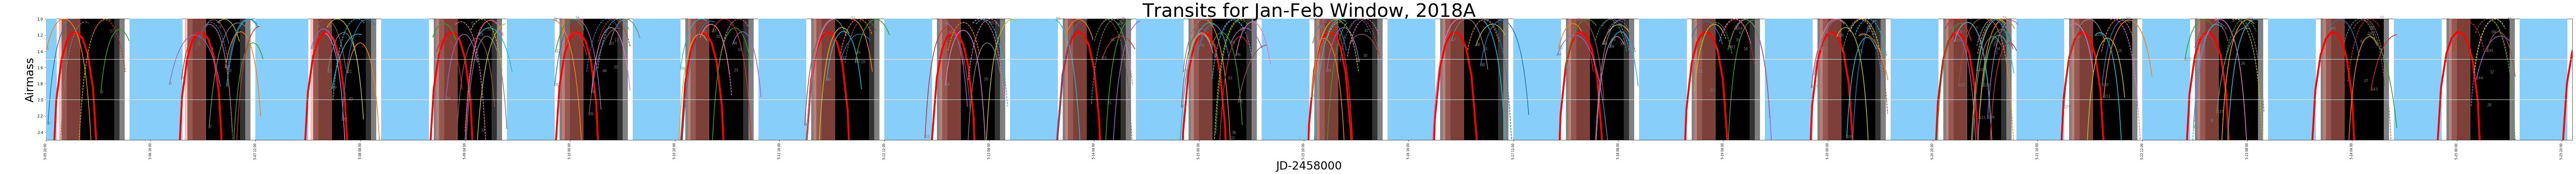

In [120]:
for a in range(0,len(WD_airmass)):
    if WD_airmass[a]<0.0:
        WD_airmass[a]=np.nan

plt.figure(figsize=(100,6))
plt.gcf().subplots_adjust(bottom=0.15,top=0.90,left=0.05,right=0.99)
plt.plot(ts-2458000.,WD_airmass,color='red',linewidth=5.0,zorder=6)
#plt.plot(ts-2458000,sun_altaz.alt,color='yellow',linewidth=5.0,zorder=9)
plt.fill_between(ts-2458000,-90,90,where=sun_altaz.alt<0*u.deg,color='0.5',zorder=0)
plt.fill_between(ts-2458000,-90,90,where=sun_altaz.alt<-6*u.deg,color='0.35',zorder=1)
plt.fill_between(ts-2458000,-90,90,where=sun_altaz.alt<-12*u.deg,color='0.2',zorder=2)
plt.fill_between(ts-2458000,-90,90,where=sun_altaz.alt<-18*u.deg,color='k',zorder=3)
plt.fill_between(ts-2458000,-90,90,where=sun_altaz.alt>0*u.deg,color='lightskyblue',zorder=4)

#for i in range(0,len(end_of_night)):
#    a=np.array([np.float64((end_of_night[i]-4*u.hour).jd)-2458000,np.float64(end_of_night[i].jd)-2458000])
#    plt.fill_between(a,0,5,color='salmon',alpha=0.5,zorder=5)
    
for i in range(0,len(start_of_night)):
    a=np.array([np.float64((start_of_night[i]+0.5*u.hour).jd)-2458000.,np.float64((start_of_night[i]+4.5*u.hour).jd)-2458000])
    plt.fill_between(a,0,5,color='salmon',alpha=0.5,zorder=5)

for o in range(0,len(names)):
#    print '********* Confirmed: ', o
#    print '   --> NAME: ', names[o]
#    un=np.where(uniquenames==names[o])[0]
#    print '   --> DATE: ', Time(midtimejd[o],format='jd').iso
#    print '   --> SIZE: ', planetradius[un], planetradius[un]*2.817, ' (R_jup,R_nep)'
#    print '   --> MASS: ', planetmass[un],planetmass[un]*18.535,' (M_jup,M_nep)'
    plt.plot(obj_times[o,:]-2458000,obj_airmass[o,:],linewidth=2.0,zorder=7)
    plt.annotate(str(int(o)),xy=(obj_times[o,0]-2458000,obj_airmass[o,0]),color='grey',fontsize=10,zorder=8)

#print ' '
#print ' '
#print ' '

for k in range(0,len(K2_allnames)):
#    print '********* K2 Candidates: ', k
#    print '   --> NAME: ', K2_allnames[k]
#    un=np.where(K2_nm==K2_allnames[k])[0]
#    print '   --> DATE: ', Time(K2_alltransits[k],format='iso').iso
#    print '   --> SIZE: ', K2_Rp[un], K2_Rp[un]/3.883, ' (R_jup,R_nep)'
    #print '   --> MASS: ', planetmass[un],planetmass[un]*18.535,' (M_jup,M_nep)'
    plt.plot(K2_transittimearr[k,:]-2458000,K2_transitairmass[k,:],linewidth=2.0,zorder=7,linestyle='--')
    plt.annotate(str(int(k)),xy=(K2_transittimearr[k,0]-2458000+3./24.,K2_transitairmass[k,0]),color='grey',fontsize=10,zorder=8)
    
Begin=Time(['2018-05-05 20:00:00.0'],format='iso',location=('-70.6915d','-29.0182d'))
End=Time(['2018-05-25 10:00:00.0'],format='iso',location=('-70.6915d','-29.0182d'))

                
plt.axhline(y=1.5,color='white',linewidth=1.0,zorder=9)
plt.axhline(y=2.0,color='white',linewidth=1.0,zorder=10)

    
plt.xticks(ts_t-2458000,time_arr_t,fontsize=8,rotation='vertical')    

plt.ylim(2.5,1)
plt.xlim(Begin.jd-2458000,End.jd-2458000+0.5)
plt.title('Transits for Jan-Feb Window, 2018A',fontsize=50)
plt.ylabel('Airmass',fontsize=30)
plt.xlabel('JD-2458000',fontsize=30)

plt.savefig('M.pdf')

In [279]:
print midair[21]
print startair[21]
print endair[21]

1.34
1.34
1.84


In [49]:
b=144
print names[b]
c=np.where(uniquenames==names[b])[0]

print 'MASS [jup]:   ', planetmass[c]
print 'RADIUS [jup]: ', planetradius[c]
print 'DENSITY [jup]:', planetdensity[c]
print 'Tdepth [%]:   ', transit[c]
print 'TEMP [K]:     ', planettemp[c]
print 'ABSORP [ppm]: ', ABSORP[c]*10**6.
print 'STAR V:       ', mag[c]

HATS-35 b
MASS [jup]:    [ 1.222]
RADIUS [jup]:  [ 1.464]
DENSITY [jup]: [ 0.484]
Tdepth [%]:    [ nan]
TEMP [K]:      [ 2031.53951148]
ABSORP [ppm]:  [ 301.55573871]
STAR V:        [ 12.56]


In [64]:
d=np.where(names=='WASP-107 b')
e=np.where(uniquenames=='WASP-107 b')

print d
print Time(startjd[d],format='jd').iso

print startair[d]
print midair[d]
print endair[d]

print obj_airmass[d,:]

(array([112]),)
['2018-05-20 21:45:38.016']
[ 1.69]
[ 1.24]
[ 1.08]
[[[ 3.56852265  3.41178793  3.26876478  3.13776194  3.01735554  2.9063383
    2.80367986  2.70849552  2.62002143  2.5375946   2.46063683  2.38864158
    2.32116321  2.2578081   2.19822729  2.14211035  2.08918018  2.03918868
    1.99191307  1.94715274  1.90472658  1.86447063  1.82623619  1.78988799
    1.75530282  1.72236814  1.690981    1.66104703  1.63247958  1.60519898
    1.57913179  1.55421028  1.53037186  1.50755861  1.48571686  1.46479684
    1.44475229  1.42554021  1.40712056  1.38945604  1.37251182  1.3562554
    1.34065641  1.32568641  1.31131881  1.29752867  1.28429263  1.27158875
    1.25939646  1.24769641  1.23647043  1.22570145  1.2153734   1.20547115
    1.19598047  1.18688797  1.17818103  1.16984778  1.16187704  1.15425827
    1.14698155  1.14003755  1.13341749  1.12711311  1.12111665  1.1154208
    1.11001872  1.10490399  1.10007059  1.0955129   1.09122567  1.087204
    1.08344334  1.07993946  1.0766884

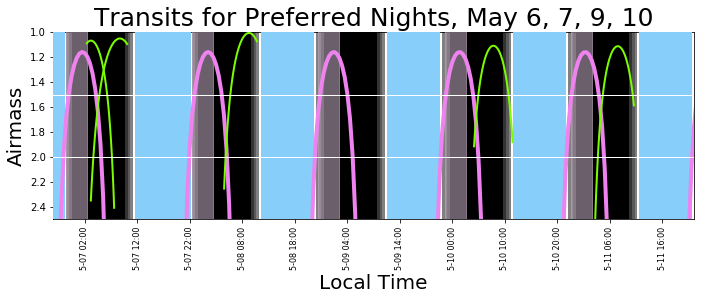

In [148]:
for a in range(0,len(WD_airmass)):
    if WD_airmass[a]<0.0:
        WD_airmass[a]=np.nan

plt.figure(figsize=(10,4))
plt.gcf().subplots_adjust(bottom=0.25,top=0.90,left=0.1,right=0.99)
plt.plot(ts-2458000.,WD_airmass,color='violet',linewidth=4.0,zorder=6)
#plt.plot(ts-2458000,sun_altaz.alt,color='yellow',linewidth=5.0,zorder=9)
plt.fill_between(ts-2458000,-90,90,where=sun_altaz.alt<0*u.deg,color='0.5',zorder=0)
plt.fill_between(ts-2458000,-90,90,where=sun_altaz.alt<-6*u.deg,color='0.35',zorder=1)
plt.fill_between(ts-2458000,-90,90,where=sun_altaz.alt<-12*u.deg,color='0.2',zorder=2)
plt.fill_between(ts-2458000,-90,90,where=sun_altaz.alt<-18*u.deg,color='k',zorder=3)
plt.fill_between(ts-2458000,-90,90,where=sun_altaz.alt>0*u.deg,color='lightskyblue',zorder=4)

#for i in range(0,len(end_of_night)):
#    a=np.array([np.float64((end_of_night[i]-4*u.hour).jd)-2458000,np.float64(end_of_night[i].jd)-2458000])
#    plt.fill_between(a,0,5,color='salmon',alpha=0.5,zorder=5)
    
for i in range(0,len(start_of_night)):
    a=np.array([np.float64((start_of_night[i]+0.5*u.hour).jd)-2458000.,np.float64((start_of_night[i]+4.5*u.hour).jd)-2458000])
    plt.fill_between(a,0,5,color='thistle',alpha=0.5,zorder=5)

for o in range(0,len(names)):
    if o in np.array([6,7,20,36,42]):
        plt.plot(obj_times[o,:]-2458000,obj_airmass[o,:],linewidth=2.0,zorder=7,color='lawngreen')
        #plt.annotate(str(int(o)),xy=(obj_times[o,0]-2458000,obj_airmass[o,0]),color='grey',fontsize=10,zorder=8)


#for k in range(0,len(K2_allnames)):
#    plt.plot(K2_transittimearr[k,:]-2458000,K2_transitairmass[k,:],linewidth=2.0,zorder=7,linestyle='--')
#    plt.annotate(str(int(k)),xy=(K2_transittimearr[k,0]-2458000+3./24.,K2_transitairmass[k,0]),color='grey',fontsize=10,zorder=8)
    
Begin=Time(['2018-05-06 20:00:00.0'],format='iso',location=('-70.6915d','-29.0182d'))
End=Time(['2018-05-11 10:00:00.0'],format='iso',location=('-70.6915d','-29.0182d'))
                        
                
plt.axhline(y=1.5,color='white',linewidth=1.0,zorder=9)
plt.axhline(y=2.0,color='white',linewidth=1.0,zorder=10)

    
plt.xticks(ts_t-2458000,time_arr_t,fontsize=8,rotation='vertical')    

plt.ylim(2.5,1)

plt.xlim(Begin.jd-2458000,End.jd-2458000+0.5)
plt.title('Transits for Preferred Nights, May 6, 7, 9, 10',fontsize=25)
plt.ylabel('Airmass',fontsize=20)
plt.xlabel('Local Time',fontsize=20)

plt.savefig('M_proposal.pdf')